# Convolutional Neural Network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocessing

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True,
                                  vertical_flip=True)
training_set = train_datagen.flow_from_directory('datasets/train')

Found 5951 images belonging to 4 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True,
                                 vertical_flip=True)
test_set = test_datagen.flow_from_directory('datasets/test')

Found 159 images belonging to 4 classes.


In [4]:
import matplotlib.image as img

In [5]:
training_set.image_shape

(256, 256, 3)

## Building the CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
cnn = Sequential()

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[256, 256, 3]))

In [9]:
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [10]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(64, activation='relu'))
"""
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(8, activation='relu'))
"""

"\ncnn.add(Dense(32, activation='relu'))\ncnn.add(Dense(16, activation='relu'))\ncnn.add(Dense(8, activation='relu'))\n"

In [13]:
cnn.add(Dense(4, activation='softmax'))

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 200,callbacks=[early_stop])

Epoch 1/200
188/188 [==============================] - 244s 1s/step - loss: 1.0693 - accuracy: 0.5522 - val_loss: 2.7301 - val_accuracy: 0.3774
Epoch 2/200
188/188 [==============================] - 241s 1s/step - loss: 0.5174 - accuracy: 0.8069 - val_loss: 3.7928 - val_accuracy: 0.4340
Epoch 3/200
188/188 [==============================] - 241s 1s/step - loss: 0.3555 - accuracy: 0.8579 - val_loss: 3.8454 - val_accuracy: 0.4340
Epoch 4/200
188/188 [==============================] - 241s 1s/step - loss: 0.2772 - accuracy: 0.8957 - val_loss: 2.5873 - val_accuracy: 0.3899
Epoch 5/200
188/188 [==============================] - 240s 1s/step - loss: 0.2853 - accuracy: 0.8959 - val_loss: 4.6497 - val_accuracy: 0.4591
Epoch 6/200
188/188 [==============================] - 241s 1s/step - loss: 0.2139 - accuracy: 0.9169 - val_loss: 4.9842 - val_accuracy: 0.4340
Epoch 7/200
188/188 [==============================] - 241s 1s/step - loss: 0.1716 - accuracy: 0.9377 - val_loss: 7.3831 - val_accuracy:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
modal_loss = pd.DataFrame(cnn.history.history)

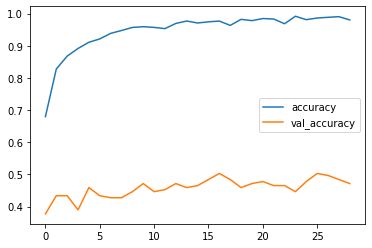

In [18]:
modal_loss[['accuracy','val_accuracy']].plot()

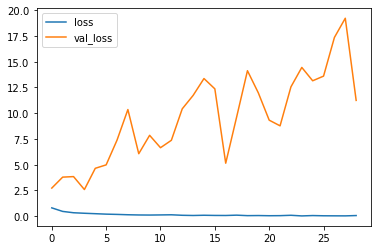

In [19]:
modal_loss[['loss','val_loss']].plot()

## Adding Dropout to decrease overfitting

In [20]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[256, 256, 3]))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
"""
cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(8, activation='relu'))
"""
cnn.add(Dense(4, activation='softmax'))

In [21]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 200,callbacks=[early_stop])

Epoch 1/200
188/188 [==============================] - 309s 2s/step - loss: 1.4908 - accuracy: 0.4229 - val_loss: 2.9458 - val_accuracy: 0.4528
Epoch 2/200
188/188 [==============================] - 256s 1s/step - loss: 0.6875 - accuracy: 0.7328 - val_loss: 3.3784 - val_accuracy: 0.4340
Epoch 3/200
188/188 [==============================] - 246s 1s/step - loss: 0.6262 - accuracy: 0.7668 - val_loss: 3.3099 - val_accuracy: 0.3899
Epoch 4/200
188/188 [==============================] - 251s 1s/step - loss: 0.4650 - accuracy: 0.8244 - val_loss: 5.5709 - val_accuracy: 0.4214
Epoch 5/200
188/188 [==============================] - 244s 1s/step - loss: 0.4509 - accuracy: 0.8198 - val_loss: 7.5610 - val_accuracy: 0.3711
Epoch 6/200
188/188 [==============================] - 241s 1s/step - loss: 0.3772 - accuracy: 0.8564 - val_loss: 4.3101 - val_accuracy: 0.4214
Epoch 7/200
188/188 [==============================] - 253s 1s/step - loss: 0.3298 - accuracy: 0.8734 - val_loss: 11.1503 - val_accuracy

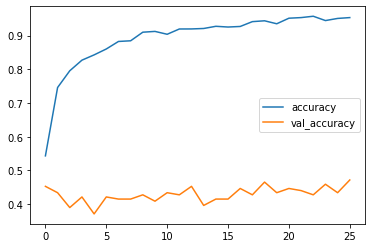

In [23]:
modal_loss = pd.DataFrame(cnn.history.history)
modal_loss[['accuracy','val_accuracy']].plot()

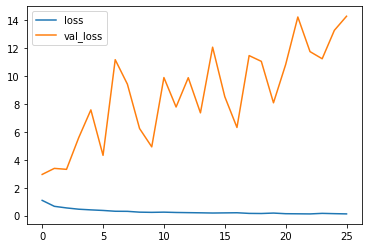

In [24]:
modal_loss[['loss','val_loss']].plot()

## Making a single prediction

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('datasets/rice_brown_leaf.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
training_set.class_indices

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


{'Bacterial leaf blight': 0, 'Blast': 1, 'Brown spot': 2, 'Leaf smut': 3}

In [26]:
result

array([3], dtype=int64)

In [27]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Leaf smut


In [28]:
test_image = image.load_img('datasets/rice_Leaf_smut.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)

In [29]:
result

array([3], dtype=int64)

In [30]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Leaf smut


In [31]:
test_image = image.load_img('datasets/rice_Leaf_smut1.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
result

array([3], dtype=int64)

In [32]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Leaf smut


In [33]:
test_image = image.load_img('datasets/rice_Bacterial-leaf-blight.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
result

array([3], dtype=int64)

In [34]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Leaf smut


In [35]:
pred = cnn.predict_classes(test_set)

In [36]:
test_set.class_indices

{'Bacterial leaf blight': 0, 'Blast': 1, 'Brown spot': 2, 'Leaf smut': 3}

### predicted classes

In [37]:
pred

array([3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 0, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 1, 3, 0, 3, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 1,
       3, 3, 3, 3, 3], dtype=int64)

### correct classes

In [38]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,pred))
print(confusion_matrix(test_set.classes,pred))

              precision    recall  f1-score   support

           0       0.25      0.03      0.05        40
           1       0.29      0.30      0.29        40
           2       0.00      0.00      0.00        40
           3       0.24      0.69      0.36        39

    accuracy                           0.25       159
   macro avg       0.19      0.25      0.17       159
weighted avg       0.19      0.25      0.17       159

[[ 1 13  0 26]
 [ 1 12  0 27]
 [ 1  7  0 32]
 [ 1 10  1 27]]


In [40]:
train_datagen

In [41]:
training_set

In [42]:
# confirm the iterator works
batchX, batchy = training_set.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [43]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)            

In [44]:
cnn.save('model.h5')